In [2]:
N = 100
np.random.seed(0)
X1 = sp.stats.multivariate_normal([0, 0], [[0.7, 0], [0, 0.7]]).rvs(100)
X2 = sp.stats.multivariate_normal([1, 1], [[0.8, 0.2], [0.2, 0.8]]).rvs(100)
X3 = sp.stats.multivariate_normal([-1, 1], [[0.8, 0.2], [0.2, 0.8]]).rvs(100)
y1 = np.zeros(N)
y2 = np.ones(N)
y3 = 2*np.ones(N)
X = np.vstack([X1, X2, X3])
y = np.hstack([y1, y2, y3])

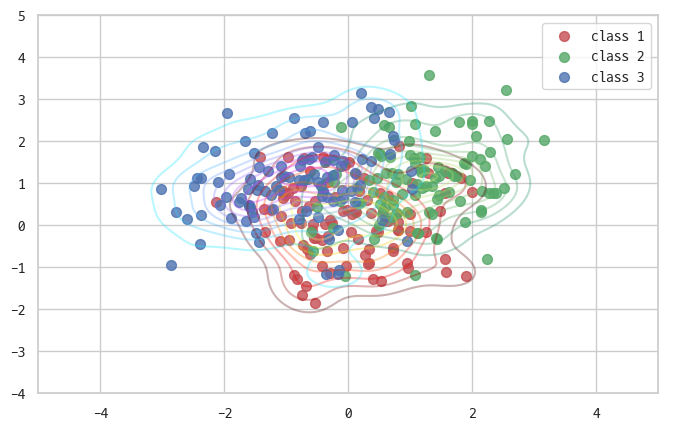

In [3]:
plt.scatter(X1[:, 0], X1[:, 1], alpha=0.8, s=50, color='r', label="class 1")
plt.scatter(X2[:, 0], X2[:, 1], alpha=0.8, s=50, color='g', label="class 2")
plt.scatter(X3[:, 0], X3[:, 1], alpha=0.8, s=50, color='b', label="class 3")
sns.kdeplot(X1[:, 0], X1[:, 1], alpha=0.3, cmap=mpl.cm.hot)
sns.kdeplot(X2[:, 0], X2[:, 1], alpha=0.3, cmap=mpl.cm.summer)
sns.kdeplot(X3[:, 0], X3[:, 1], alpha=0.3, cmap=mpl.cm.cool)
plt.xlim(-5, 5)
plt.ylim(-4, 5)
plt.legend()
plt.show()

In [4]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis(store_covariance=True).fit(X, y)

In [5]:
qda.means_

array([[-8.01254084e-04,  1.19457204e-01],
       [ 1.16303727e+00,  1.03930605e+00],
       [-8.64060404e-01,  1.02295794e+00]])

In [6]:
qda.covariance_[0]

array([[ 0.73846319, -0.01762041],
       [-0.01762041,  0.72961278]])

In [7]:
qda.covariance_[1]

array([[0.66534246, 0.21132313],
       [0.21132313, 0.78806006]])

In [8]:
qda.covariance_[2]

array([[0.9351386 , 0.22880955],
       [0.22880955, 0.79142383]])

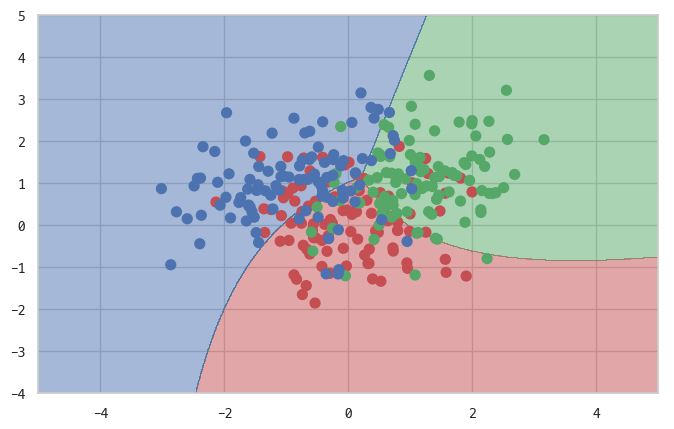

In [9]:
xmin, xmax = -5, 5
ymin, ymax = -4, 5
XX, YY = np.meshgrid(np.arange(xmin, xmax, (xmax-xmin)/1000),
                     np.arange(ymin, ymax, (ymax-ymin)/1000))
ZZ = np.reshape(qda.predict(np.array([XX.ravel(), YY.ravel()]).T),
                XX.shape)
cmap = mpl.colors.ListedColormap(sns.color_palette(["r", "g", "b"]).as_hex())
plt.contourf(XX, YY, ZZ, cmap=cmap, alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=cmap)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.show()

In [70]:
from sklearn.datasets import load_iris
iris = load_iris()

x = load_iris().data
y = load_iris().target
columns = load_iris().feature_names
df = pd.DataFrame(x, columns=["sl", "sw", "pl", "pw"])
dfy = pd.DataFrame(y, columns=["target"])
# df = pd.concat([df, dfy], axis=1)
# df.head()

In [78]:
df.head()

,sl,sw,pl,pw
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [79]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis(store_covariance=True).fit(df, dfy)

/home/p829911/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [80]:
y_pred = qda.predict(df)

In [81]:
from sklearn.metrics import confusion_matrix

confusion_matrix(dfy, y_pred)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  1, 49]])

In [82]:
from sklearn.metrics import classification_report

print(classification_report(dfy, y_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.98      0.96      0.97        50
   virginica       0.96      0.98      0.97        50

   micro avg       0.98      0.98      0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150



In [83]:
from sklearn.metrics import roc_curve

qda.decision_function(df).shape

(150, 3)

1.0
0.9988
0.9962


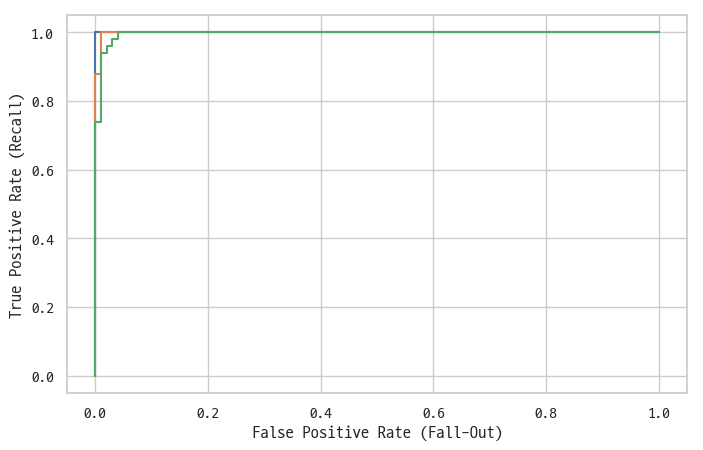

In [133]:
from sklearn.preprocessing import label_binarize

y = label_binarize(dfy, [0, 1, 2])

fpr = [None] * 3
tpr = [None] * 3
thr = [None] * 3

for i in range(3):
    model = qda.fit(X, y[:, i])
    fpr[i], tpr[i], thr[i] = roc_curve(y[:, i], model.decision_function(df))
    print(auc(fpr[i], tpr[i]))
    plt.plot(fpr[i], tpr[i])

plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.show()

In [86]:
model.predict_proba(df)

array([[1.00000000e+00, 2.81065030e-40],
       [1.00000000e+00, 1.00129582e-33],
       [1.00000000e+00, 2.44917067e-35],
       [1.00000000e+00, 7.35999137e-31],
       [1.00000000e+00, 1.84380008e-40],
       [1.00000000e+00, 5.57653985e-40],
       [1.00000000e+00, 1.06503653e-33],
       [1.00000000e+00, 6.51072610e-37],
       [1.00000000e+00, 6.60670293e-29],
       [1.00000000e+00, 3.81153398e-34],
       [1.00000000e+00, 1.90353298e-43],
       [1.00000000e+00, 9.35957531e-34],
       [1.00000000e+00, 6.19633842e-34],
       [1.00000000e+00, 4.57199272e-34],
       [1.00000000e+00, 1.37040675e-55],
       [1.00000000e+00, 1.66451851e-51],
       [1.00000000e+00, 1.38333901e-45],
       [1.00000000e+00, 6.40780094e-39],
       [1.00000000e+00, 1.00912300e-42],
       [1.00000000e+00, 1.19712390e-40],
       [1.00000000e+00, 4.21291400e-37],
       [1.00000000e+00, 4.45673931e-38],
       [1.00000000e+00, 1.01654881e-42],
       [1.00000000e+00, 3.67531487e-30],
       [1.000000

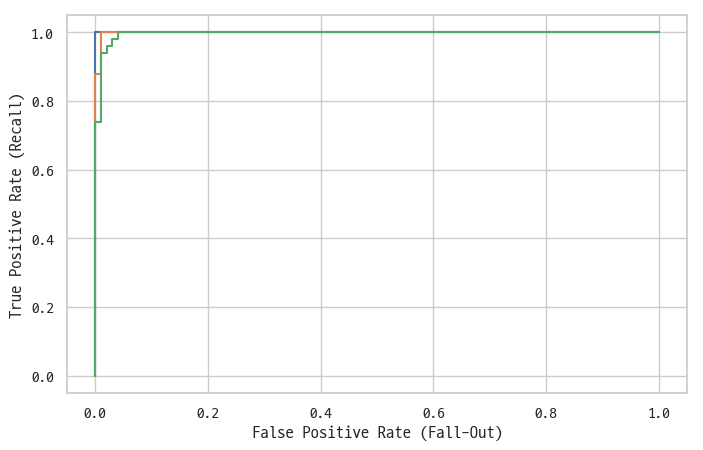

In [54]:
from sklearn.preprocessing import label_binarize

iris = load_iris()
X = iris.data
y = label_binarize(iris.target, [0, 1, 2])

fpr = [None] * 3
tpr = [None] * 3
thr = [None] * 3

for i in range(3):
    model = qda.fit(X, y[:, i])
    fpr[i], tpr[i], thr[ic] = roc_curve(y[:, i], model.decision_function(X))
    plt.plot(fpr[i], tpr[i])

plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.show()

In [73]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=3,
                                 solver="svd", store_covariance=True).fit(df, dfy)

/home/p829911/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


No handles with labels found to put in legend.


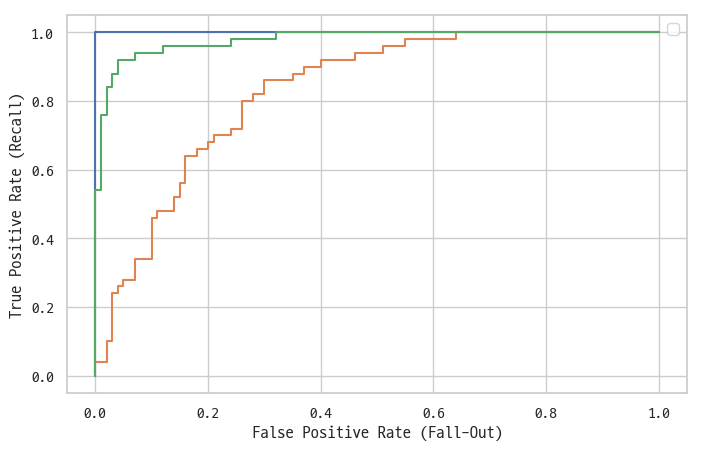

In [76]:
from sklearn.preprocessing import label_binarize

y = label_binarize(dfy, [0, 1, 2])

fpr = [None] * 3
tpr = [None] * 3
thr = [None] * 3

for i in range(3):
    model = lda.fit(X, y[:, i])
    fpr[i], tpr[i], thr[i] = roc_curve(y[:, i], model.decision_function(df))
    plt.plot(fpr[i], tpr[i])

plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.legend()
plt.show()

In [119]:
from sklearn.datasets import load_iris
iris = load_iris()

x = load_iris().data
y = load_iris().target
columns = load_iris().feature_names
df = pd.DataFrame(x, columns=["sl", "sw", "pl", "pw"])
dfy = pd.DataFrame(y, columns=["target"])
# df = pd.concat([df, dfy], axis=1)
# df.head()

In [120]:
from sklearn.naive_bayes import GaussianNB
model_norm = GaussianNB().fit(df, dfy)

/home/p829911/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [121]:
model_norm.classes_

array([0, 1, 2])

In [122]:
model_norm.class_count_

array([50., 50., 50.])

In [124]:
y_pred = model_norm.predict(df)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [126]:
from sklearn.metrics import confusion_matrix

confusion_matrix(dfy, y_pred)

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  3, 47]])

In [127]:
from sklearn.metrics import classification_report

print(classification_report(dfy, y_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.94      0.94      0.94        50
   virginica       0.94      0.94      0.94        50

   micro avg       0.96      0.96      0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



In [101]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import auc

y = label_binarize(dfy, [0, 1, 2])

auc: 1.0
auc: 0.9818
auc: 0.989


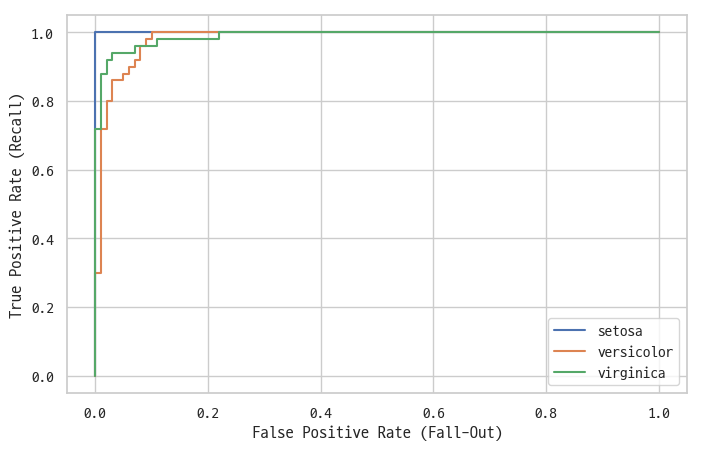

In [106]:
fpr = [None] * 3
tpr = [None] * 3
thr = [None] * 3

for i in range(3):
    model = model_norm.fit(X, y[:, i])
    fpr[i], tpr[i], thr[i] = roc_curve(y[:, i], model.predict_proba(df)[:,1])
    print("auc:", auc(fpr[i], tpr[i]))
    plt.plot(fpr[i], tpr[i])

plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.legend(iris.target_names)
plt.show()

In [215]:
from sklearn.datasets import load_digits
digits = load_digits()

In [216]:
x = digits.data
y = digits.target

In [217]:
x.shape

(1797, 64)

In [218]:
digits.target.shape

(1797,)

In [219]:
from sklearn.preprocessing import Binarizer

In [220]:
x_b = Binarizer(8).fit(x)

In [221]:
x = x_b.transform(x)

In [222]:
from sklearn.naive_bayes import BernoulliNB
model_bern = BernoulliNB().fit(x, y)

In [223]:
y_pred = model_bern.predict(x)

In [224]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y, y_pred)

array([[171,   0,   0,   0,   1,   3,   2,   0,   0,   1],
       [  0, 146,   8,   0,   0,   1,   3,   0,  13,  11],
       [  1,   8, 156,   3,   0,   0,   0,   1,   4,   4],
       [  0,   2,   2, 155,   0,   2,   0,   7,   5,  10],
       [  0,   3,   0,   0, 168,   1,   1,   5,   3,   0],
       [  0,   0,   1,   2,   2, 166,   0,   0,   0,  11],
       [  1,   5,   0,   0,   2,   0, 171,   0,   2,   0],
       [  0,   0,   2,   0,   0,   0,   0, 175,   1,   1],
       [  0,  15,   7,   1,   0,   5,   0,   2, 139,   5],
       [  0,   0,   0,   3,   0,   3,   0,   8,   4, 162]])

In [225]:
from sklearn.metrics import classification_report

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       178
           1       0.82      0.80      0.81       182
           2       0.89      0.88      0.88       177
           3       0.95      0.85      0.89       183
           4       0.97      0.93      0.95       181
           5       0.92      0.91      0.91       182
           6       0.97      0.94      0.96       181
           7       0.88      0.98      0.93       179
           8       0.81      0.80      0.81       174
           9       0.79      0.90      0.84       180

   micro avg       0.90      0.90      0.90      1797
   macro avg       0.90      0.90      0.90      1797
weighted avg       0.90      0.90      0.90      1797



In [195]:
theta = np.exp(model_bern.feature_log_prob_)
theta

array([[0.00555556, 0.00555556, 0.12777778, 0.95555556, 0.80555556,
        0.07222222, 0.00555556, 0.00555556, 0.00555556, 0.01666667,
        0.87222222, 0.88333333, 0.73888889, 0.77777778, 0.01111111,
        0.00555556, 0.00555556, 0.03888889, 0.96666667, 0.28333333,
        0.07222222, 0.87222222, 0.03888889, 0.00555556, 0.00555556,
        0.05      , 0.85      , 0.07777778, 0.00555556, 0.52222222,
        0.1       , 0.00555556, 0.00555556, 0.06111111, 0.77777778,
        0.02777778, 0.00555556, 0.47222222, 0.18333333, 0.00555556,
        0.00555556, 0.00555556, 0.93888889, 0.05      , 0.05      ,
        0.77222222, 0.21111111, 0.00555556, 0.00555556, 0.00555556,
        0.92222222, 0.62222222, 0.65      , 0.91111111, 0.07222222,
        0.00555556, 0.00555556, 0.00555556, 0.07222222, 0.98333333,
        0.92777778, 0.20555556, 0.00555556, 0.00555556],
       [0.00543478, 0.00543478, 0.07608696, 0.625     , 0.75      ,
        0.3423913 , 0.01086957, 0.00543478, 0.00543478, 0.0

In [201]:
x[0,:]

array([0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.])

In [ ]:
# 이미지 보이기
plt.gray()
plt.matshow(x[0,:])
plt.show()

In [226]:
from sklearn.datasets import load_digits
digits = load_digits()

In [227]:
x = digits.data
y = digits.target

In [228]:
x.shape

(1797, 64)

In [229]:
digits.target.shape

(1797,)

In [230]:
from sklearn.naive_bayes import MultinomialNB
model_mult = MultinomialNB().fit(x, y)

In [231]:
y_pred = model_mult.predict(x)

In [232]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y, y_pred)

array([[175,   0,   0,   0,   3,   0,   0,   0,   0,   0],
       [  0, 137,  14,   0,   0,   1,   2,   0,  13,  15],
       [  0,   7, 160,   0,   0,   0,   0,   0,   8,   2],
       [  0,   0,   2, 159,   0,   2,   0,   5,   8,   7],
       [  1,   0,   0,   0, 173,   0,   0,   4,   3,   0],
       [  0,   0,   0,   0,   1, 157,   1,   1,   2,  20],
       [  0,   2,   0,   0,   1,   1, 176,   0,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0, 178,   1,   0],
       [  0,  11,   1,   0,   1,   0,   1,   1, 154,   5],
       [  0,   1,   0,   1,   1,   1,   0,  11,   7, 158]])

In [233]:
from sklearn.metrics import classification_report

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       178
           1       0.87      0.75      0.81       182
           2       0.90      0.90      0.90       177
           3       0.99      0.87      0.93       183
           4       0.96      0.96      0.96       181
           5       0.97      0.86      0.91       182
           6       0.98      0.97      0.98       181
           7       0.89      0.99      0.94       179
           8       0.78      0.89      0.83       174
           9       0.76      0.88      0.82       180

   micro avg       0.91      0.91      0.91      1797
   macro avg       0.91      0.91      0.91      1797
weighted avg       0.91      0.91      0.91      1797



In [ ]:
theta = np.exp(model_bern.feature_log_prob_)
for i in range(len(theta)):
    plt.imshow(np.reshape(theta[i], [8, 8]), cmap='Greys_r')
    plt.title('Number {0}'.format(i))
    plt.show()